In [1]:
import numpy as np
import torch
from OkadaTorch import SPOINT, SRECTF
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 20

var_list = [
    "ux", "uy", "uz", "uxx", "uxy", "uyx", "uyy",  "uzx",  "uzy"
]

# `SPOINT` (single station)

In [2]:
ALP = 0.5
X = torch.tensor(0.5)
Y = torch.tensor(-0.5)

D = 1.0
dip = torch.tensor(45.0)
SD = torch.sin(torch.deg2rad(dip))
CD = torch.cos(torch.deg2rad(dip))

DISL1, DISL2, DISL3 = 4.0, 3.0, 0.0

out = SPOINT(ALP, X, Y, D, SD, CD, DISL1, DISL2, DISL3, compute_strain=True)
out

[tensor(0.3194),
 tensor(-0.2997),
 tensor(0.5736),
 tensor(0.4528),
 tensor(0.4729),
 tensor(0.0979),
 tensor(0.0660),
 tensor(-0.2761),
 tensor(0.9807)]

# `SPOINT` (multiple stations)

In [3]:
ALP = 0.5
x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)
X, Y = np.meshgrid(x, y)
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

D = 1.0
dip = torch.tensor(45.0)
SD = torch.sin(torch.deg2rad(dip))
CD = torch.cos(torch.deg2rad(dip))

DISL1, DISL2, DISL3 = 4.0, 3.0, 0.0

out = SPOINT(ALP, X, Y, D, SD, CD, DISL1, DISL2, DISL3, compute_strain=True)
out

[tensor([[ 0.1568,  0.1559,  0.1549,  ...,  0.1966,  0.1975,  0.1982],
         [ 0.1586,  0.1577,  0.1567,  ...,  0.2028,  0.2036,  0.2042],
         [ 0.1603,  0.1594,  0.1584,  ...,  0.2091,  0.2098,  0.2103],
         ...,
         [-0.0252, -0.0258, -0.0264,  ...,  0.0242,  0.0245,  0.0248],
         [-0.0251, -0.0257, -0.0263,  ...,  0.0199,  0.0202,  0.0206],
         [-0.0250, -0.0255, -0.0260,  ...,  0.0157,  0.0161,  0.0165]],
        dtype=torch.float64),
 tensor([[ 0.1753,  0.1771,  0.1789,  ..., -0.1843, -0.1821, -0.1798],
         [ 0.1745,  0.1763,  0.1781,  ..., -0.1873, -0.1849, -0.1825],
         [ 0.1735,  0.1754,  0.1773,  ..., -0.1902, -0.1877, -0.1851],
         ...,
         [ 0.0073,  0.0075,  0.0076,  ...,  0.0054,  0.0048,  0.0042],
         [ 0.0069,  0.0070,  0.0071,  ...,  0.0021,  0.0016,  0.0011],
         [ 0.0065,  0.0066,  0.0066,  ..., -0.0012, -0.0016, -0.0020]],
        dtype=torch.float64),
 tensor([[-0.1359, -0.1376, -0.1392,  ...,  0.1642,  0.161

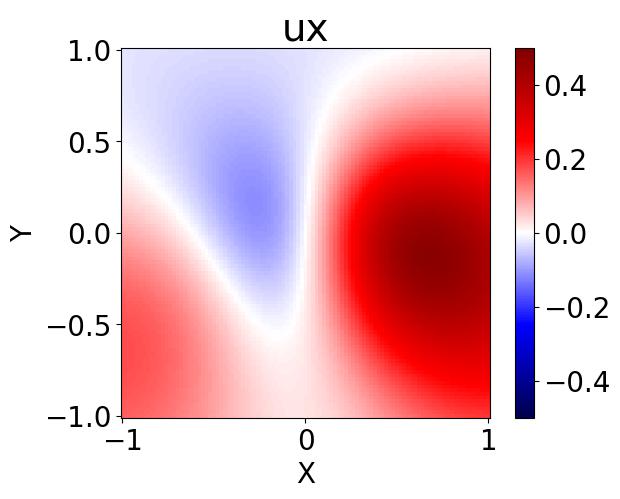

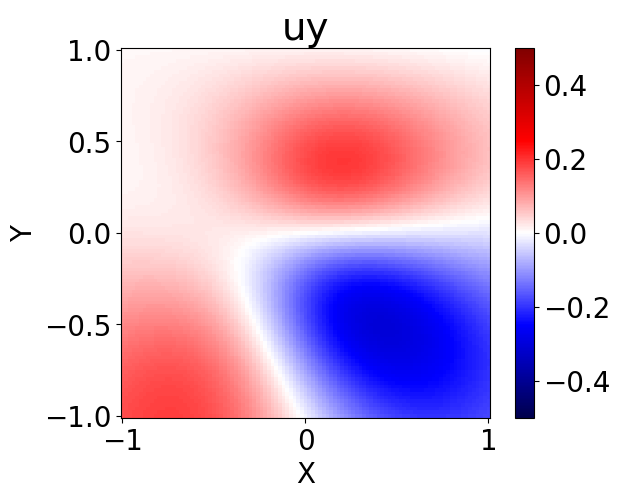

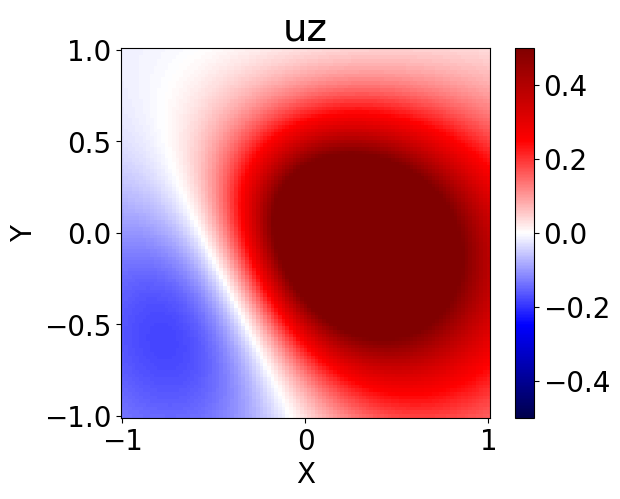

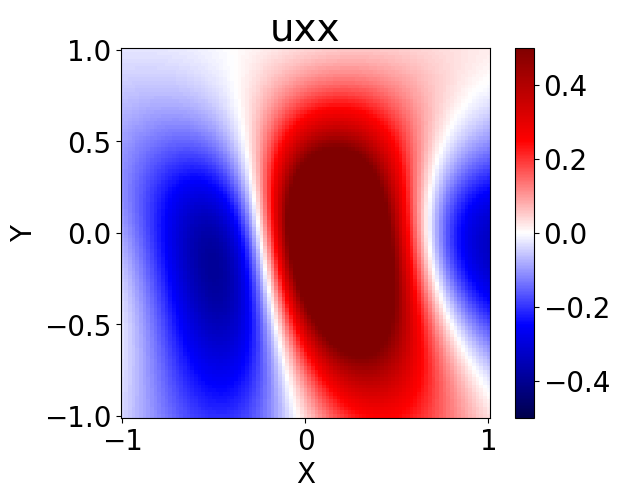

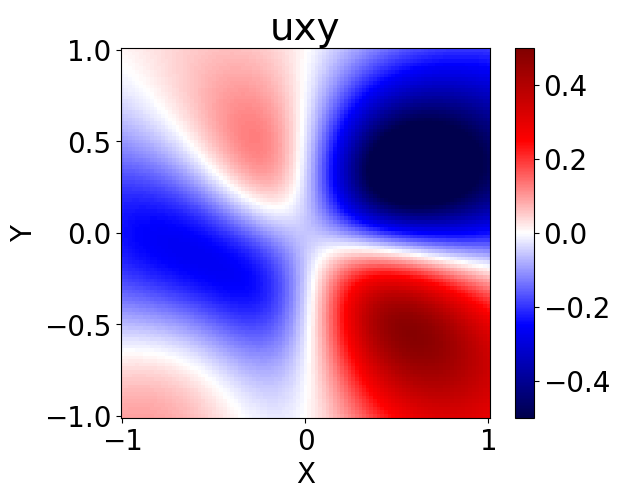

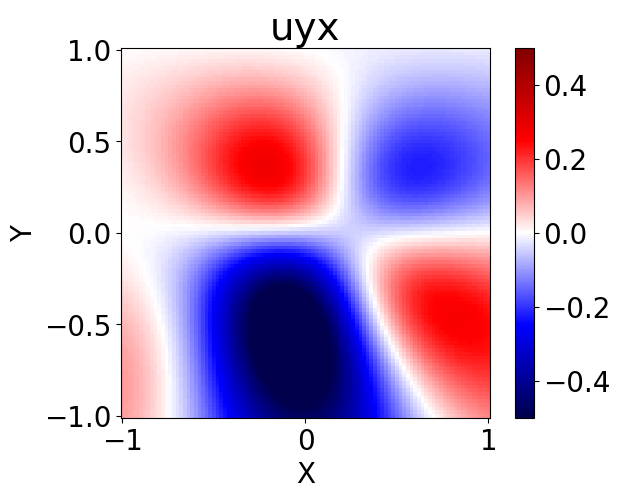

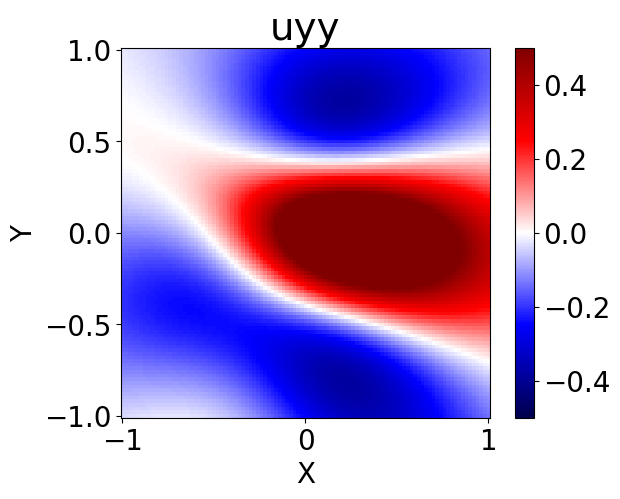

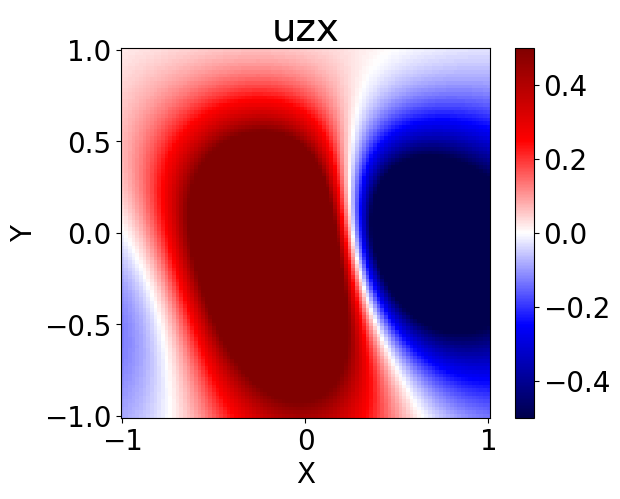

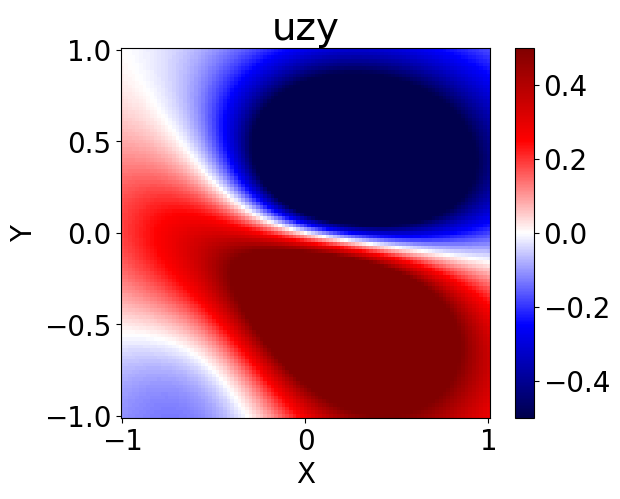

In [4]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(X, Y, out[i].detach().numpy(), cmap="seismic", vmin=-0.5, vmax=0.5)
    ax.set_aspect("equal")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()

# `SRECTF` (single station)

In [5]:
ALP = 0.5
X = torch.tensor(0.5)
Y = torch.tensor(-0.5)

DEP = 1.0
AL, AW = 0.5, 0.2
dip = torch.tensor(45.0)
SD = torch.sin(torch.deg2rad(dip))
CD = torch.cos(torch.deg2rad(dip))

DISL1, DISL2, DISL3 = 4.0, 3.0, 0.0

out = SRECTF(ALP, X, Y, DEP, AL, AW, SD, CD, DISL1, DISL2, DISL3, compute_strain=True)
out

[tensor(0.0171),
 tensor(-0.0284),
 tensor(0.0467),
 tensor(0.0588),
 tensor(0.0325),
 tensor(-0.0367),
 tensor(-0.0299),
 tensor(0.0485),
 tensor(0.1255)]

# `SRECTF` (multiple stations)

In [6]:
ALP = 0.5
x = np.linspace(-1, 1, 101)
y = np.linspace(-1, 1, 101)
X, Y = np.meshgrid(x, y)
X = torch.from_numpy(X)
Y = torch.from_numpy(Y)

DEP = 1.0
AL, AW = 0.5, 0.2
dip = torch.tensor(45.0)
SD = torch.sin(torch.deg2rad(dip))
CD = torch.cos(torch.deg2rad(dip))

DISL1, DISL2, DISL3 = 4.0, 3.0, 0.0

out = SRECTF(ALP, X, Y, DEP, AL, AW, SD, CD, DISL1, DISL2, DISL3, compute_strain=True)
out

[tensor([[ 0.0163,  0.0163,  0.0164,  ...,  0.0152,  0.0155,  0.0158],
         [ 0.0165,  0.0165,  0.0166,  ...,  0.0158,  0.0161,  0.0164],
         [ 0.0166,  0.0167,  0.0168,  ...,  0.0164,  0.0167,  0.0170],
         ...,
         [-0.0018, -0.0019, -0.0020,  ...,  0.0022,  0.0023,  0.0023],
         [-0.0019, -0.0019, -0.0020,  ...,  0.0016,  0.0017,  0.0018],
         [-0.0019, -0.0020, -0.0020,  ...,  0.0011,  0.0012,  0.0013]],
        dtype=torch.float64),
 tensor([[ 0.0163,  0.0166,  0.0169,  ..., -0.0182, -0.0183, -0.0183],
         [ 0.0163,  0.0166,  0.0168,  ..., -0.0188, -0.0188, -0.0188],
         [ 0.0162,  0.0165,  0.0168,  ..., -0.0194, -0.0194, -0.0194],
         ...,
         [ 0.0008,  0.0008,  0.0008,  ...,  0.0014,  0.0013,  0.0013],
         [ 0.0007,  0.0007,  0.0007,  ...,  0.0009,  0.0008,  0.0008],
         [ 0.0007,  0.0007,  0.0007,  ...,  0.0004,  0.0003,  0.0003]],
        dtype=torch.float64),
 tensor([[-0.0105, -0.0107, -0.0109,  ...,  0.0146,  0.014

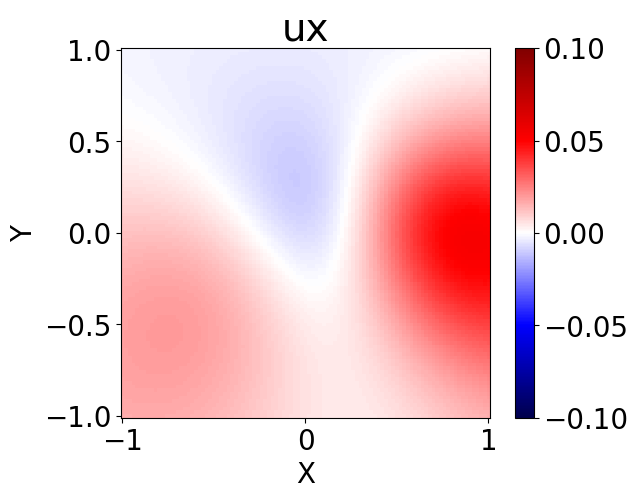

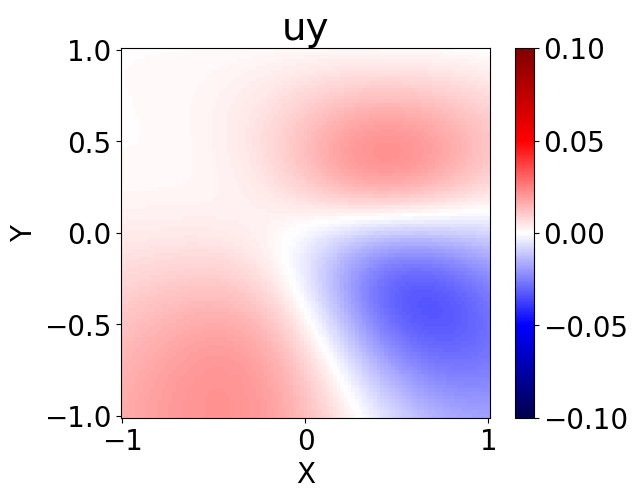

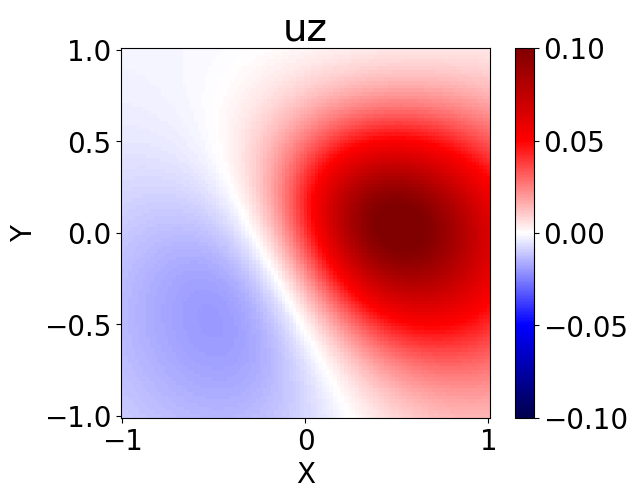

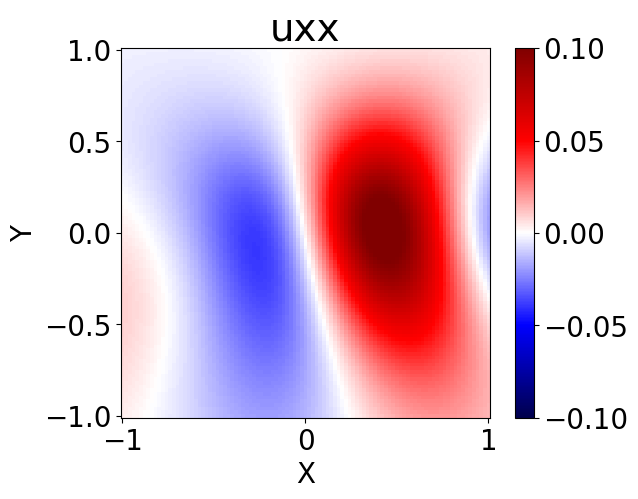

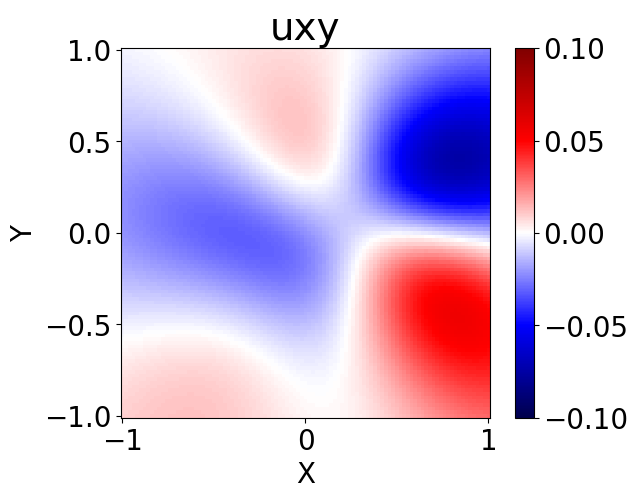

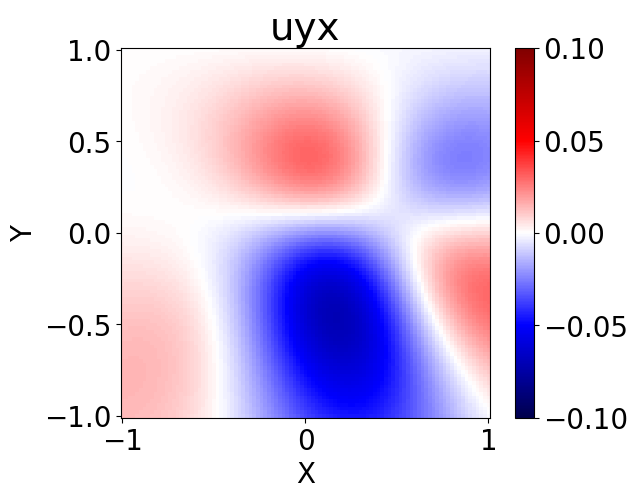

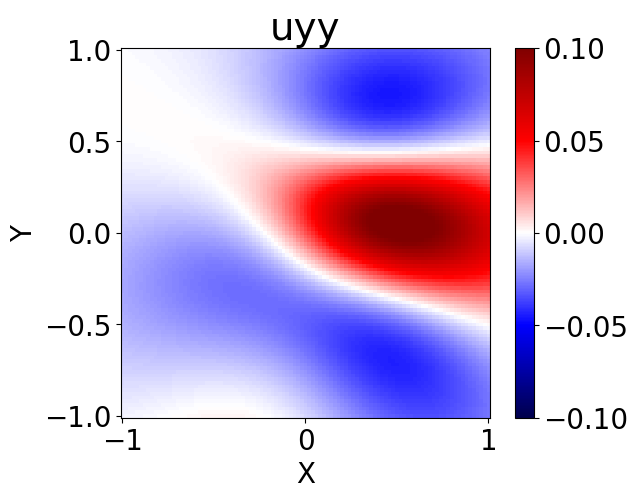

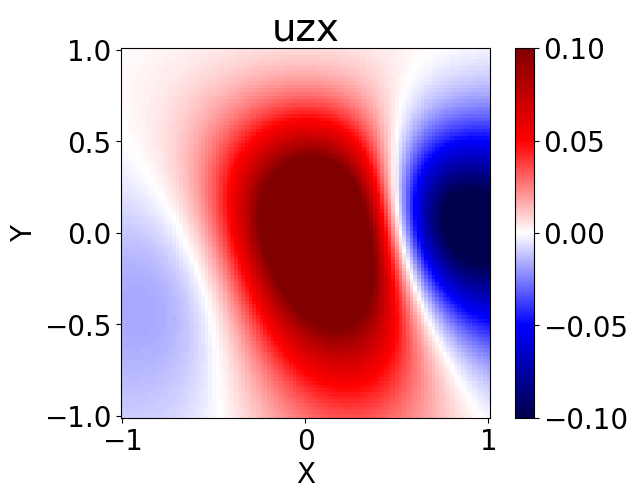

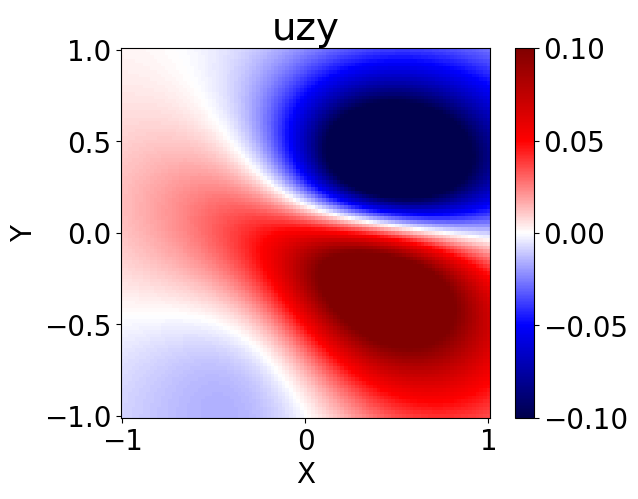

In [7]:
for i, var in enumerate(var_list):

    fig, ax = plt.subplots()
    im = ax.pcolormesh(X, Y, out[i].detach().numpy(), cmap="seismic", vmin=-0.1, vmax=0.1)
    ax.set_aspect("equal")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(var, fontsize=28)
    fig.colorbar(im)
    fig.show()